In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from scipy.stats import expon
sns.set(style="whitegrid", palette="deep")

## Basic Supply and Demand

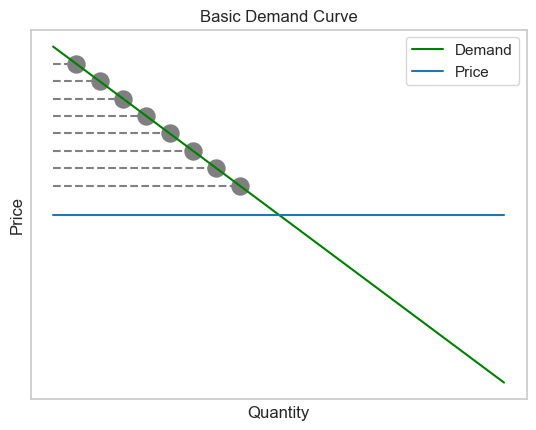

In [587]:
quantity_vals = np.arange(1, 60)
demand_vals = 80 - quantity_vals
supply_vals = 20 + quantity_vals
plt.plot(quantity_vals, demand_vals, color="green", label="Demand")
plt.plot(quantity_vals, np.ones(len(quantity_vals)) * 50, color="tab:blue", label="Price")
counter = 2
for q, d in list(zip(quantity_vals, demand_vals))[2:25]:
    if counter % 3 == 0:
        plt.scatter(q, d, color="tab:grey", s=150)
        plt.plot(quantity_vals[:counter], np.ones(len(quantity_vals[:counter])) * d, color='grey', linestyle='--')
    counter += 1
plt.legend()
plt.title("Basic Demand Curve")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.xticks([])
plt.yticks([])
plt.grid(True)
plt.show()

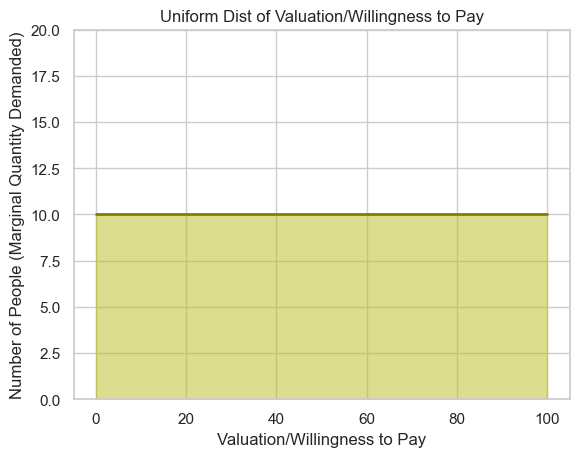

In [601]:
x = np.linspace(0, 100, 100)

y = np.full_like(x, 10)  # Flat line at y = 5

# Plot the flat line
plt.plot(x, y, color='olive', linewidth=2)
plt.fill_between(x, y, color="tab:olive", alpha=0.5)
plt.title('Uniform Dist of Valuation/Willingness to Pay')
plt.ylabel('Number of People (Marginal Quantity Demanded)')
plt.xlabel('Valuation/Willingness to Pay')
plt.grid(True)
plt.ylim(0, 20)
plt.savefig("uniform_pdf.png")
plt.show()

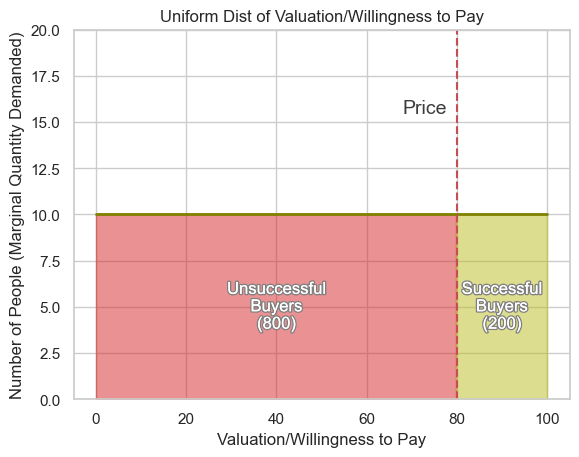

In [652]:
x = np.linspace(0, 100, 100)

y = np.full_like(x, 10)  # Flat line at y = 5

# Plot the flat line
plt.plot(x, y, color='olive', linewidth=2)
plt.fill_between(x[:-20], y[:-20], color="tab:red", alpha=0.5)
plt.fill_between(x[-21:], y[-21:], color="tab:olive", alpha=0.5)
plt.axvline(x=80, color='r', linestyle='--')
plt.annotate('Price', (68, 15.5), fontsize=14, alpha=0.9)
right_text = plt.text(90, 5, 'Successful\nBuyers\n(200)', fontsize=12, ha='center', va='center', color='white')
right_text.set_path_effects([
    path_effects.withStroke(linewidth=2, foreground='tab:grey'),  # Black outline
    path_effects.Normal()  # Normal fill
])
left_text = plt.text(40, 5, 'Unsuccessful\nBuyers\n(800)', fontsize=12, ha='center', va='center', color='white')
left_text.set_path_effects([
    path_effects.withStroke(linewidth=2, foreground='tab:grey'),  # Black outline
    path_effects.Normal()  # Normal fill
])
plt.title('Uniform Dist of Valuation/Willingness to Pay')
plt.ylabel('Number of People (Marginal Quantity Demanded)')
plt.xlabel('Valuation/Willingness to Pay')
plt.grid(True)
plt.ylim(0, 20)
plt.savefig("uniform_pdf_w_price.png")
plt.show()

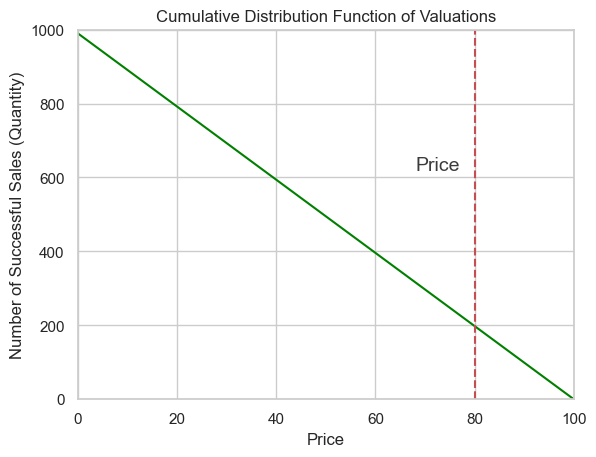

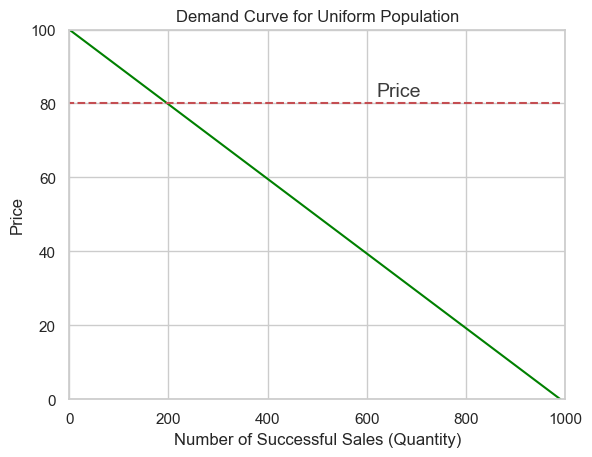

In [718]:
x = np.linspace(0, 100, 100)
y = np.arange(1000, 0, -10) - 10

plt.plot(x, y, color="green")
plt.axvline(x=80, color='r', linestyle='--')
plt.annotate('Price', (68, 620), fontsize=14, alpha=0.9)

plt.xlabel("Price")
plt.ylabel("Number of Successful Sales (Quantity)")
plt.title("Cumulative Distribution Function of Valuations")
plt.xlim(0, 100)
plt.ylim(0, 1000)
plt.savefig("uniform_cdf.png")
plt.show()

plt.plot(y, x, color="green")
plt.plot(y, np.full_like(y, 80), color='r', linestyle='--')
plt.annotate('Price', (620, 82), fontsize=14, alpha=0.9)

plt.ylabel("Price")
plt.xlabel("Number of Successful Sales (Quantity)")
plt.title("Demand Curve for Uniform Population")
plt.ylim(0, 100)
plt.xlim(0, 1000)
plt.savefig("uniform_demand.png")
plt.show()

## Normal Distribution

In [6]:
# Parameters for the normal distribution
mean = 100      # Mean of the distribution
std_dev = 20   # Standard deviation
graph_std_devs = 4 
num_market_participants = 1000
prices = np.linspace(mean - graph_std_devs * std_dev, mean + graph_std_devs * std_dev, mean)
pdf_dist = norm.pdf(prices, loc=mean, scale=std_dev) * num_market_participants
cdf_dist = (1 - norm.cdf(prices, loc=mean, scale=std_dev)) * num_market_participants # used for Demand. We use "1 - " because we count higher ones first
cdf_dist_supply = norm.cdf(prices, loc=mean, scale=std_dev) * num_market_participants

### Normal Demand

#### Basic Normal Dist

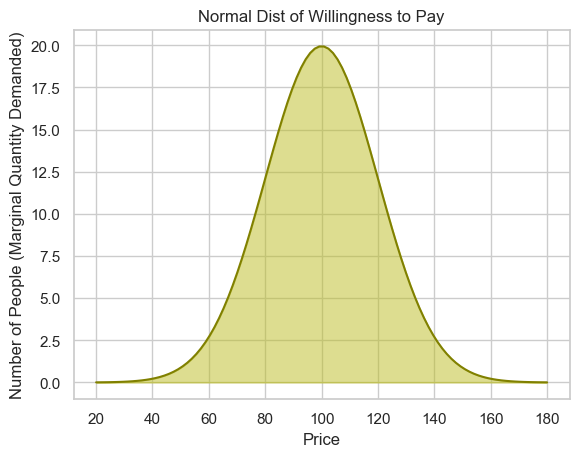

In [725]:
plt.plot(prices, pdf_dist, color='olive')
plt.fill_between(prices, pdf_dist, color="tab:olive", alpha=0.5)
plt.title('Normal Dist of Willingness to Pay')
plt.ylabel('Number of People (Marginal Quantity Demanded)')
plt.xlabel('Price')
plt.grid(True)
plt.savefig("simple_norm.png")
plt.show()

#### Normal Dist Transposed

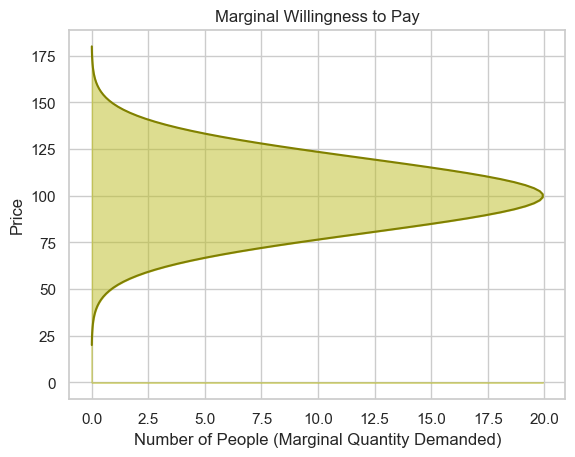

In [481]:
plt.plot(pdf_dist, prices, color='olive')
plt.fill_between(pdf_dist, prices, color="tab:olive", alpha=0.5)
plt.title('Marginal Willingness to Pay')
plt.xlabel('Number of People (Marginal Quantity Demanded)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

#### Implied Demand Curve

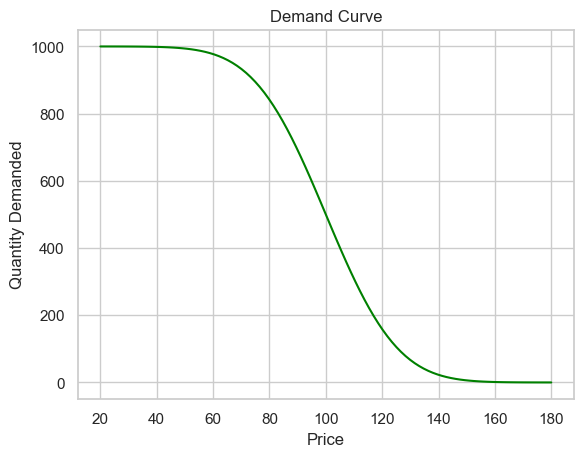

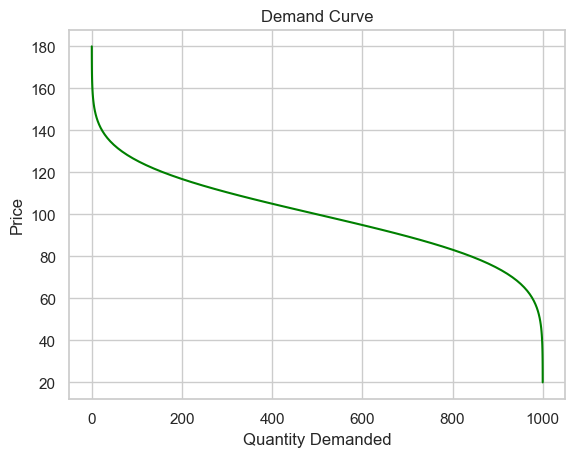

In [731]:
plt.plot(prices, cdf_dist, color='green')
plt.title('Demand Curve')
plt.ylabel('Quantity Demanded')
plt.xlabel('Price')
plt.grid(True)
plt.savefig("norm_cdf.png")
plt.show()

plt.plot(cdf_dist, prices, color='green')
plt.title('Demand Curve')
plt.xlabel('Quantity Demanded')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Graphs Side-by-Side

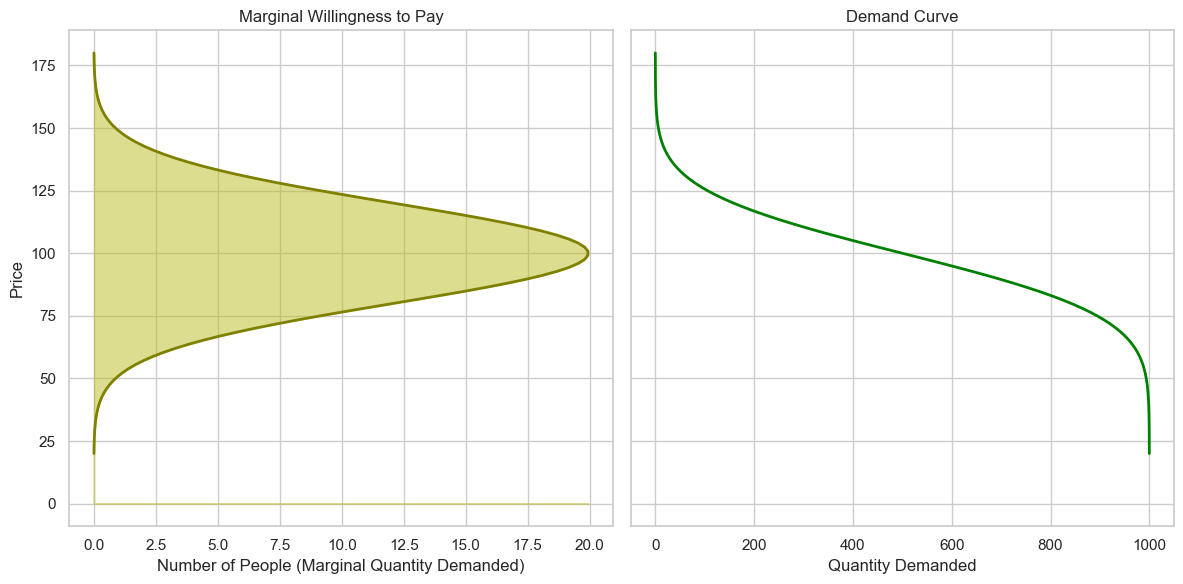

In [734]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax1.plot(pdf_dist, prices, linewidth=2, color='olive')
ax1.fill_between(pdf_dist, prices, color="tab:olive", alpha=0.5)
ax1.set_title('Marginal Willingness to Pay')
ax1.set_xlabel('Number of People (Marginal Quantity Demanded)')
ax1.set_ylabel('Price')
ax1.grid(True)
ax2.plot(cdf_dist, prices, linewidth=2, color='green')
ax2.set_title('Demand Curve')
ax2.set_xlabel('Quantity Demanded')
ax2.grid(True)
plt.tight_layout()
plt.savefig("norm_demand_combo.png")
plt.show()

### Normal Supply

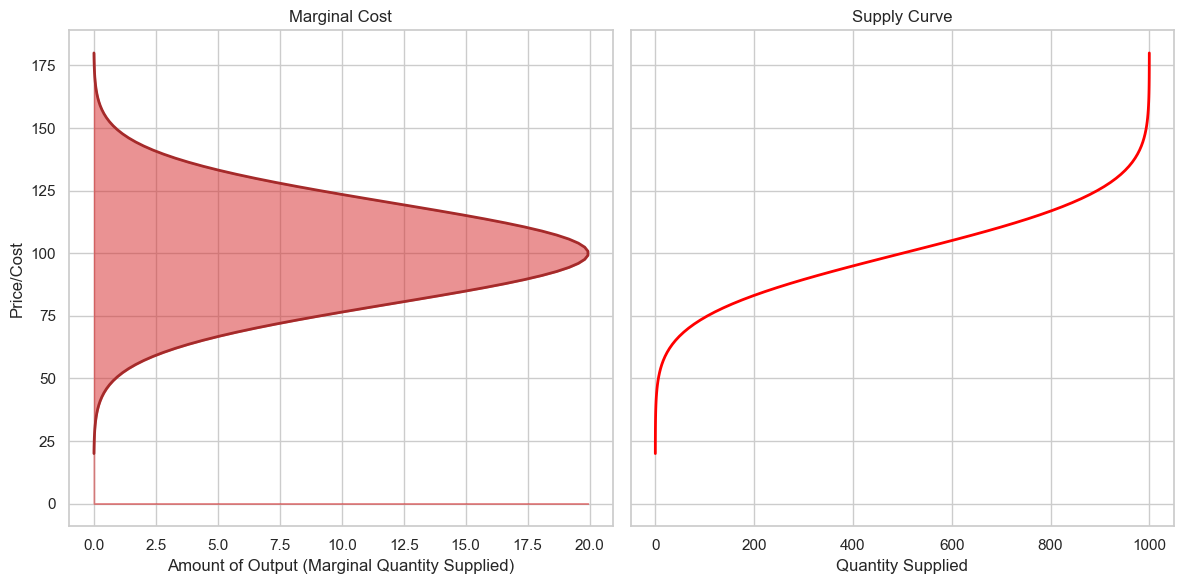

In [527]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax1.plot(pdf_dist, prices, linewidth=2, color='brown')
ax1.fill_between(pdf_dist, prices, color="tab:red", alpha=0.5)
ax1.set_title('Marginal Cost')
ax1.set_xlabel('Amount of Output (Marginal Quantity Supplied)')
ax1.set_ylabel('Price/Cost')
ax1.grid(True)
ax2.plot(cdf_dist_supply, prices, linewidth=2, color='red')
ax2.set_title('Supply Curve')
ax2.set_xlabel('Quantity Supplied')
ax2.grid(True)
plt.tight_layout()
plt.show()

### 'Normal' Market

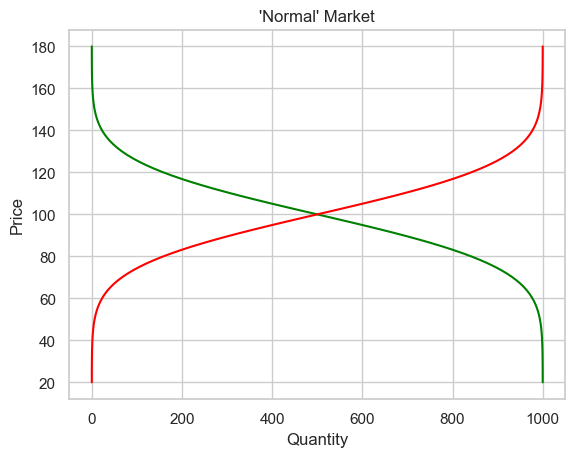

In [243]:
plt.plot(cdf_dist, prices, color='green')
plt.plot(cdf_dist_supply, prices, color='red')
plt.title('\'Normal\' Market')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.grid(True)
plt.show()

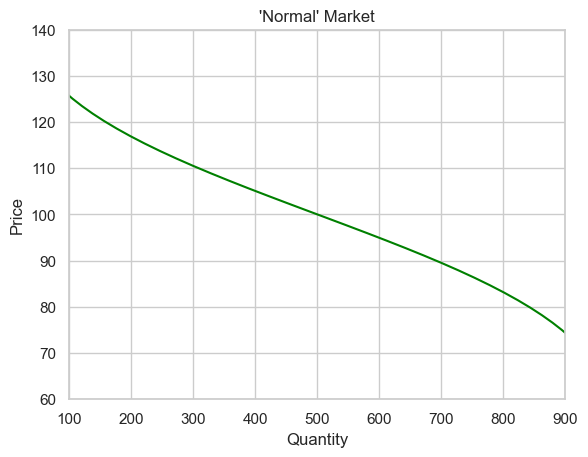

In [10]:
plt.plot(cdf_dist, prices, color='green')
#plt.plot(cdf_dist_supply, prices, color='red')
plt.title('\'Normal\' Market')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.xlim(100, 900)
plt.ylim(60, 140)
plt.grid(True)
plt.savefig("zoomed_norm.png")
plt.show()

## Bimodal Distribution

In [519]:
# Parameters for the normal distributions
mean_one = 60      # Mean of lower distribution
mean_two = 180      # Mean of lower distribution

std_dev = 20   # Standard deviation
graph_std_devs = 4 
num_market_participants = 1000

prices = np.linspace(mean_one - graph_std_devs * std_dev, mean_two + graph_std_devs * std_dev, (mean_two - mean_one) // 2 + mean_one)
pdf_dist = norm.pdf(prices, loc=mean_one, scale=std_dev) * (num_market_participants / 2) + norm.pdf(prices, loc=mean_two, scale=std_dev) * (num_market_participants / 2)
cdf_dist_demand = (1 - norm.cdf(prices, loc=mean_one, scale=std_dev)) * (num_market_participants / 2) + (1 - norm.cdf(prices, loc=mean_two, scale=std_dev)) * (num_market_participants / 2)# used for Demand. We use "1 - " because we count higher ones first
cdf_dist_supply = norm.cdf(prices, loc=mean_one, scale=std_dev) * (num_market_participants / 2) + norm.cdf(prices, loc=mean_two, scale=std_dev) * (num_market_participants / 2)

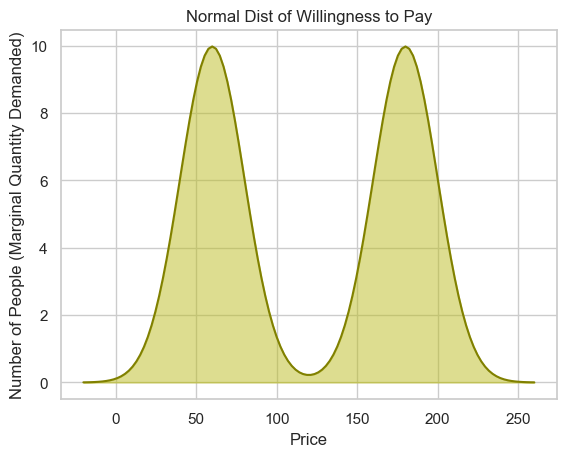

In [497]:
plt.plot(prices, pdf_dist, color='olive')
plt.fill_between(prices, pdf_dist, color="tab:olive", alpha=0.5)
plt.title('Normal Dist of Willingness to Pay')
plt.ylabel('Number of People (Marginal Quantity Demanded)')
plt.xlabel('Price')
plt.grid(True)
plt.show()

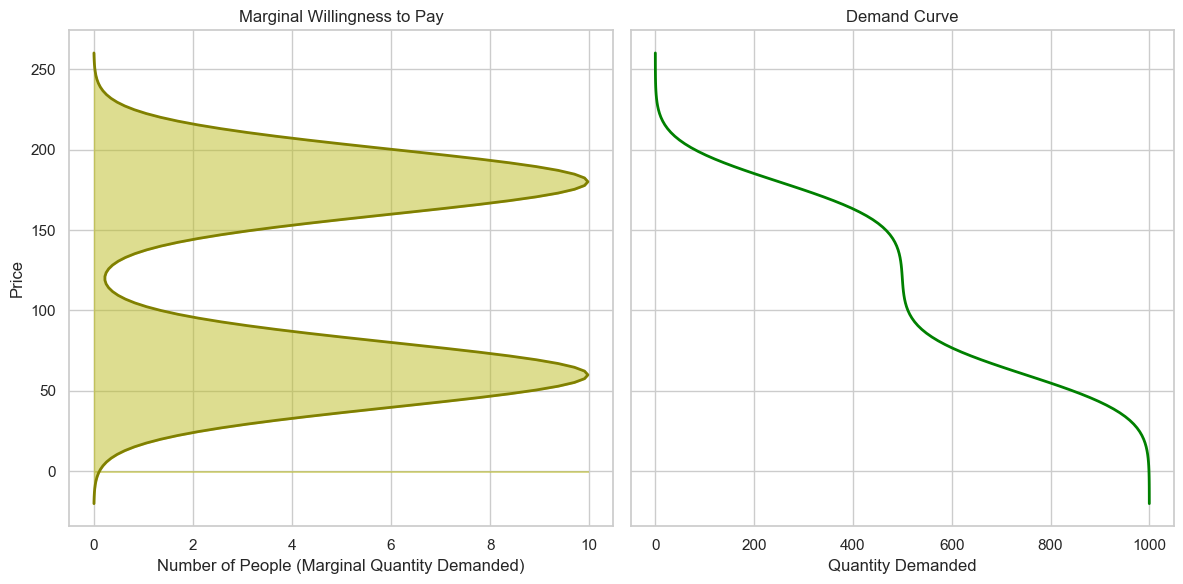

In [503]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax1.plot(pdf_dist, prices, linewidth=2, color='olive')
ax1.fill_between(pdf_dist, prices, color="tab:olive", alpha=0.5)
ax1.set_title('Marginal Willingness to Pay')
ax1.set_xlabel('Number of People (Marginal Quantity Demanded)')
ax1.set_ylabel('Price')
ax1.grid(True)
ax2.plot(cdf_dist_demand, prices, linewidth=2, color='green')
ax2.set_title('Demand Curve')
ax2.set_xlabel('Quantity Demanded')
ax2.grid(True)
plt.tight_layout()
plt.show()

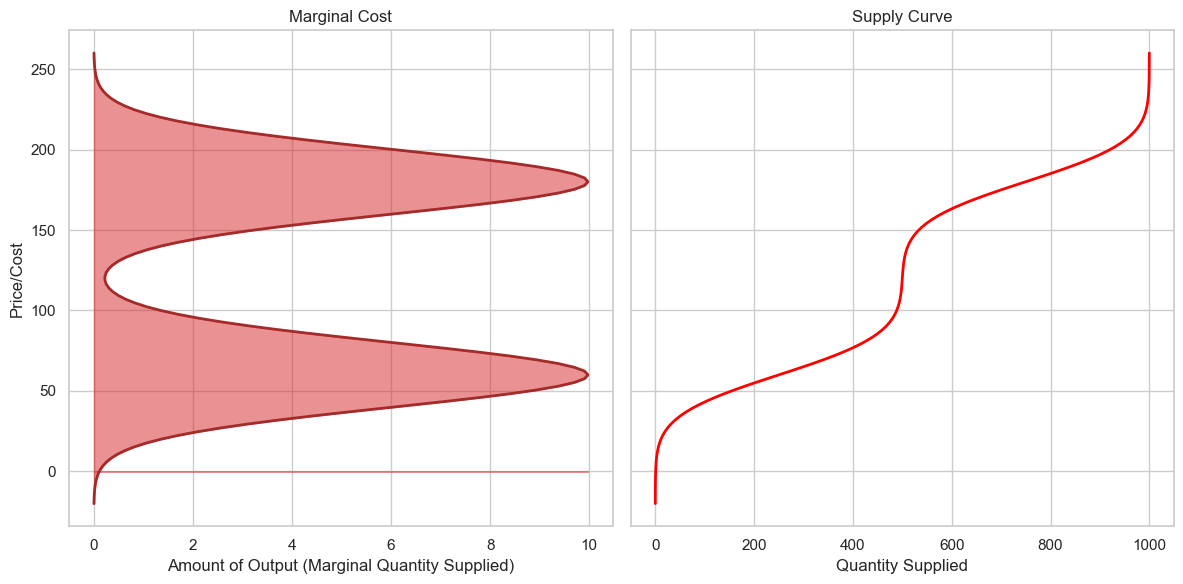

In [521]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax1.plot(pdf_dist, prices, linewidth=2, color='brown')
ax1.fill_between(pdf_dist, prices, color="tab:red", alpha=0.5)
ax1.set_title('Marginal Cost')
ax1.set_xlabel('Amount of Output (Marginal Quantity Supplied)')
ax1.set_ylabel('Price/Cost')
ax1.grid(True)
ax2.plot(cdf_dist_supply, prices, linewidth=2, color='red')
ax2.set_title('Supply Curve')
ax2.set_xlabel('Quantity Supplied')
ax2.grid(True)
plt.tight_layout()
plt.show()

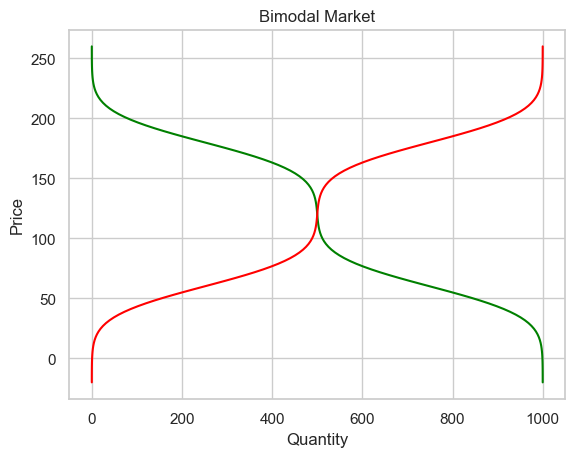

In [289]:
plt.plot(cdf_dist_demand, prices, color='green')
plt.plot(cdf_dist_supply, prices, color='red')
plt.title('Bimodal Market')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.grid(True)
plt.show()

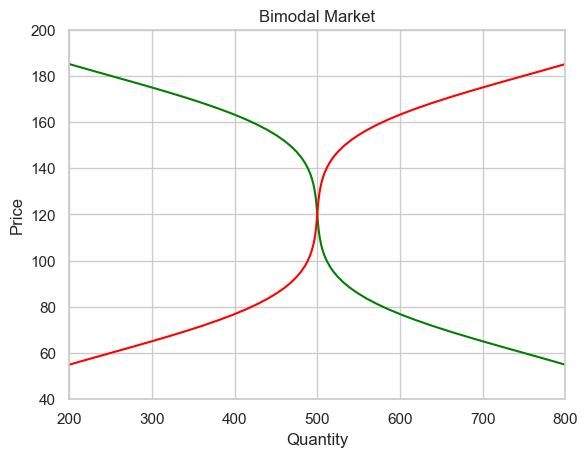

In [295]:
plt.plot(cdf_dist_demand, prices, color='green')
plt.plot(cdf_dist_supply, prices, color='red')
plt.title('Bimodal Market')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.xlim(200, 800)
plt.ylim(40, 200)
plt.grid(True)
plt.show()

## Exponential Dist

In [529]:
# Parameters for the normal distribution
mean = 100      # Mean of the distribution
std_dev = 20   # Standard deviation
graph_std_devs = 4 
num_market_participants = 1000
prices = np.linspace(0, 200)
scale = 50

# Calculate the PMF (Probability Mass Function)
pdf_curve = expon.pdf(prices, scale=scale) * num_market_participants

# Calculate the CDF (Cumulative Distribution Function)
cdf_demand = (1 - expon.cdf(prices, scale=scale)) * num_market_participants
cdf_supply = expon.cdf(prices, scale=scale) * num_market_participants

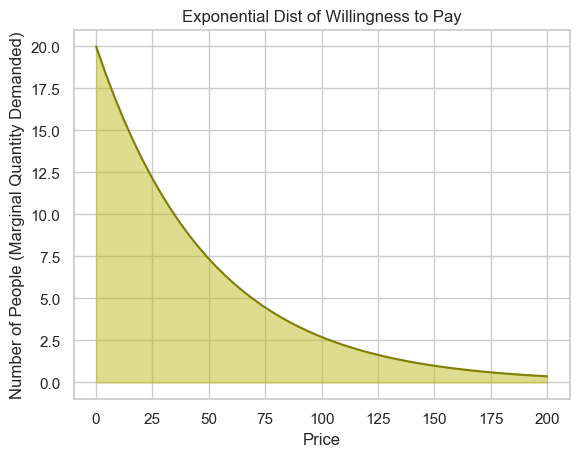

In [515]:
plt.plot(prices, pdf_curve, color='olive')
plt.fill_between(prices, pdf_curve, color="tab:olive", alpha=0.5)
plt.title('Exponential Dist of Willingness to Pay')
plt.ylabel('Number of People (Marginal Quantity Demanded)')
plt.xlabel('Price')
plt.grid(True)
plt.show()

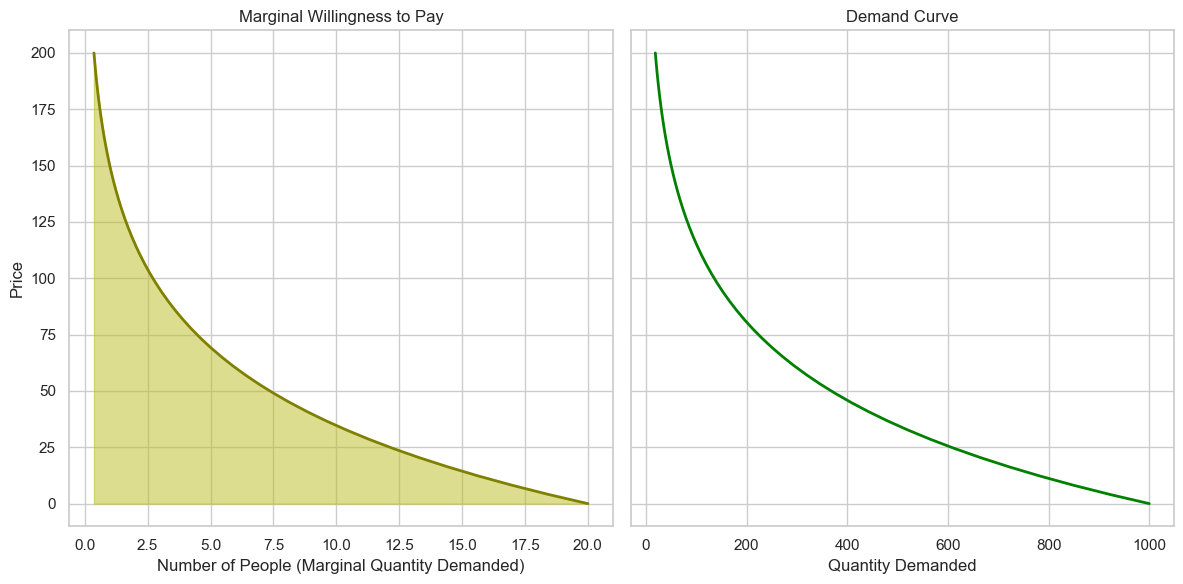

In [533]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax1.plot(pdf_curve, prices, linewidth=2, color='olive')
ax1.fill_between(pdf_curve, prices, color="tab:olive", alpha=0.5)
ax1.set_title('Marginal Willingness to Pay')
ax1.set_xlabel('Number of People (Marginal Quantity Demanded)')
ax1.set_ylabel('Price')
ax1.grid(True)
ax2.plot(cdf_demand, prices, linewidth=2, color='green')
ax2.set_title('Demand Curve')
ax2.set_xlabel('Quantity Demanded')
ax2.grid(True)
plt.tight_layout()
plt.show()

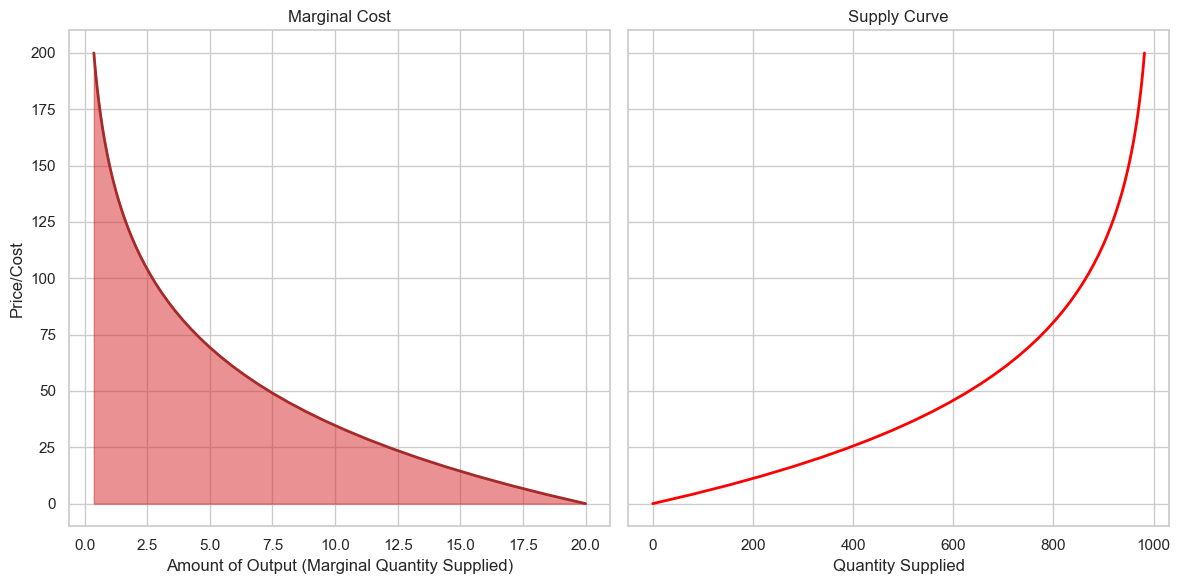

In [535]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax1.plot(pdf_curve, prices, linewidth=2, color='brown')
ax1.fill_between(pdf_curve, prices, color="tab:red", alpha=0.5)
ax1.set_title('Marginal Cost')
ax1.set_xlabel('Amount of Output (Marginal Quantity Supplied)')
ax1.set_ylabel('Price/Cost')
ax1.grid(True)
ax2.plot(cdf_supply, prices, linewidth=2, color='red')
ax2.set_title('Supply Curve')
ax2.set_xlabel('Quantity Supplied')
ax2.grid(True)
plt.tight_layout()
plt.show()

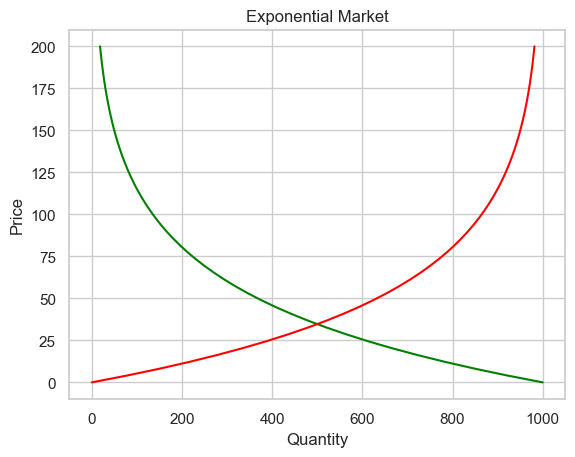

In [400]:
plt.plot(cdf_demand, prices, color='green')
plt.plot(cdf_supply, prices, color='red')
plt.title('Exponential Market')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.grid(True)
plt.show()